<a href="https://colab.research.google.com/github/mangatayaru/Unsupervised_ML-Book_Recommendation_System/blob/main/Unsupervised_ML_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1** - Javvadi L N S S Mangatayaru


# **Project Summary -**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

The Book-Crossing dataset comprises 3 files.

The users file conatins the User IDs which are anonymized and map to integers. Demographic data is provided (Location, Age). There are more null values in the age column.

Books are identified by their respective ISBN. Moreover, some content-based information  is provided in the book dataset  (Book-Title, Book-Author, Year-Of-Publication, Publisher), URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

The ratings file contains the book rating information.

The Pandas library is used for data manipulation, aggregation.
Matplotlib and Seaborn is used for visualization and behavior with respect to the target variable.



# **GitHub Link -**

https://github.com/mangatayaru/Unsupervised_ML-Book_Recommendation_System

# **Problem Statement**


The main objective is to create a book recommendation system.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
books=pd.read_csv('/content/Books.csv')
ratings=pd.read_csv('/content/Ratings.csv')
users=pd.read_csv('/content/Users.csv')

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
books.shape

(271360, 8)

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
users.shape

(278858, 3)

### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
len(books[books.duplicated()])

0

In [ ]:
len(ratings[ratings.duplicated()])

0

In [ ]:
len(users[users.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

There are only 6 nulls which are not even 0.0022% in the whole data so they can be neglected.

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

There are no null values in ratings dataset.

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

There are more number of null values in Age column. Since age criteria is not considered for any algorithm, null values will be neglected.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
# Dataset Describe

In [ ]:
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
Book-Title,271360,242135,Selected Poems,27
Book-Author,271359,102023,Agatha Christie,632
Year-Of-Publication,271360,202,2002,13903
Publisher,271358,16807,Harlequin,7535
Image-URL-S,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-M,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description

**BOOKS:**

ISBN : ISBN

Book-Title : Title of the book

Book-Author : Book author name

Year-Of-Publication : Book Publication year

Publisher : Publisher of the book

Image-URL-S : URL of image(small size)

Image-URL-M : URL of image(medium size)

Image-URL-L : URL of image(large size)

**RATINGS:**

User-ID : ID of user

ISBN : ISBN

Book-Rating : Rating of book given by user

**USERS:**

User-ID : ID of User

Location : Location of user

Age : Age of user

### Check Unique Values for each variable.

In [ ]:
books['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [ ]:
books['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [ ]:
books['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books['Publisher'].unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

RATINGS DATASET COLUMNS

In [ ]:
ratings['User-ID'].unique()

array([276725, 276726, 276727, ..., 276709, 276721, 276723])

In [ ]:
ratings['ISBN'].unique()

array(['034545104X', '0155061224', '0446520802', ..., '0679752714',
       '0806917695', '05162443314'], dtype=object)

In [ ]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

USERS DATASET COLUMNS

In [ ]:
users['User-ID'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [ ]:
users['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

In [ ]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

1. Find the top 10 popular books according to the user ratings?

In [ ]:
ratings_with_books=ratings.merge(books,on="ISBN")

In [ ]:
top_rated_books= ratings_with_books.groupby(["Book-Title"])["Book-Rating"].mean().reset_index()

In [ ]:
top_rated_books.sort_values(by="Book-Rating",ascending=False,inplace=True)

In [ ]:
rated= top_rated_books.head(10)

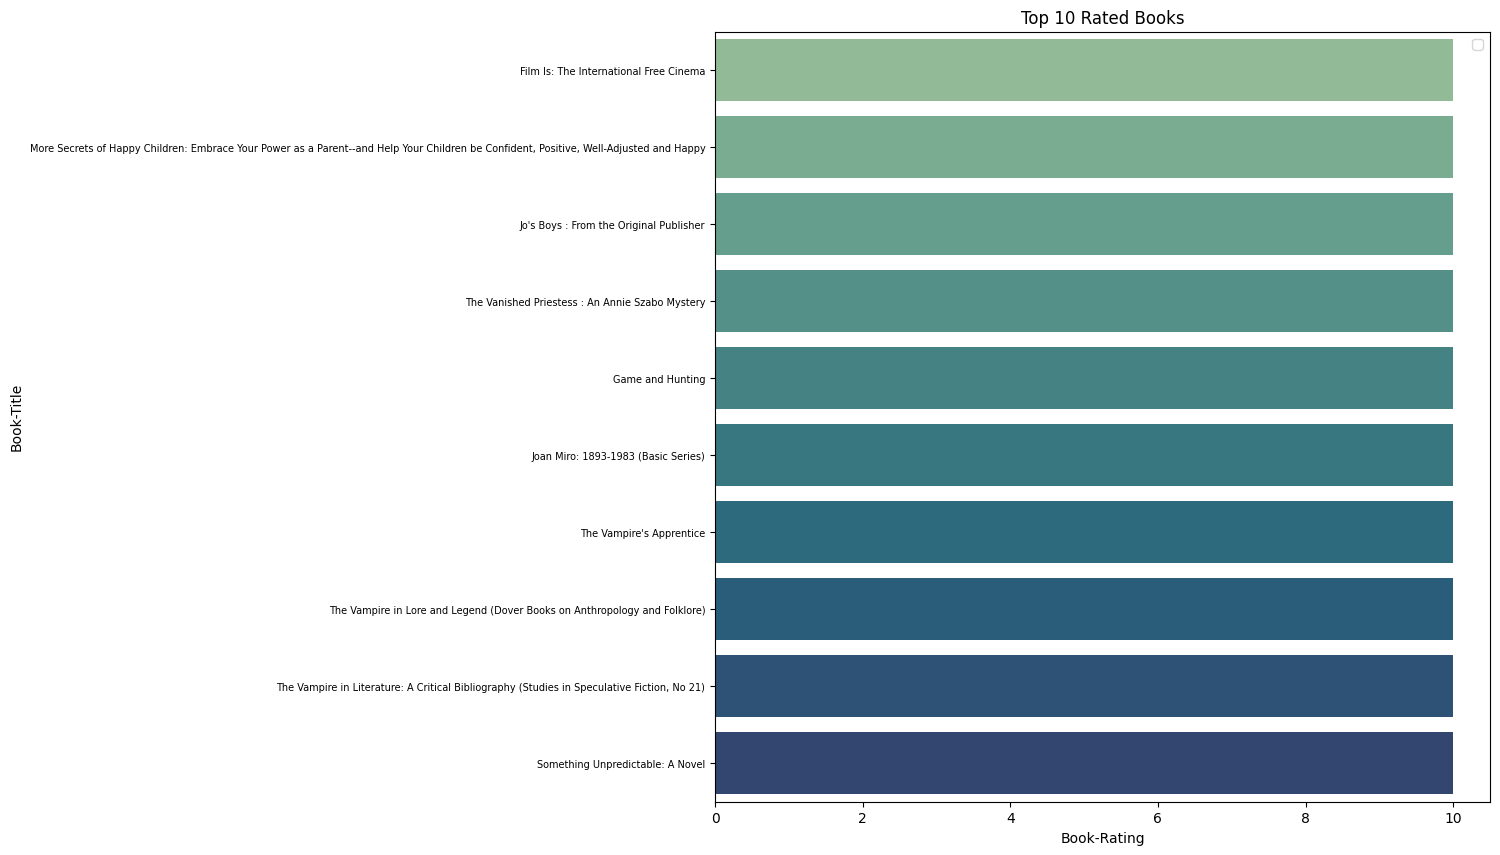

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="Book-Rating",y="Book-Title",data=rated,palette="crest",orient='h')
plt.legend()
plt.title("Top 10 Rated Books")
plt.yticks(fontsize=7)
plt.show()

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

2.Find the users who rated the most of the books?

In [ ]:
regular_users = ratings_with_books.groupby(["User-ID"])["Book-Rating"].count().reset_index()

In [ ]:
Top10_regular_users=regular_users.sort_values(by="Book-Rating",ascending=False)[0:10]
Top10_regular_users

,User-ID,Book-Rating
3629,11676,11144
65332,198711,6456
50848,153662,5814
32581,98391,5779
11848,35859,5646
70091,212898,4289
91952,278418,3996
25274,76352,3329
36648,110973,2971
77479,235105,2943


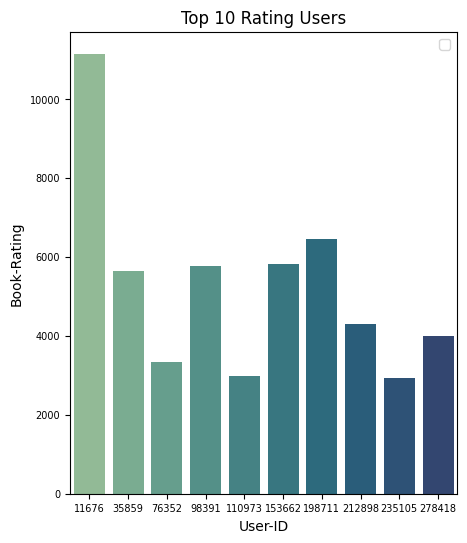

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(y="Book-Rating",x="User-ID",data=Top10_regular_users,palette="crest")
plt.legend()
plt.title("Top 10 Rating Users")
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The user with ID:11676 has rated most of the books.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

To find from which location most of the users rate?

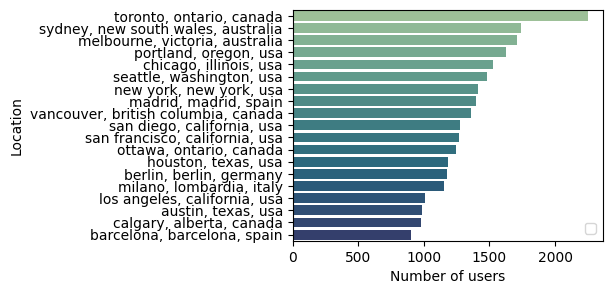

In [ ]:
a1=users.groupby(["Location"])["User-ID"].count().reset_index()
a1=a1.sort_values(by="User-ID",ascending=False)[1:20]
plt.figure(figsize=(4,3))
sns.barplot(y="Location",x="User-ID",orient="h",data=a1,palette="crest")
plt.legend()
plt.xlabel("Number of users")
plt.ylabel("Location")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the users dataset, it is evident that most of the users are from USA, Canada, Australia.

## ***ML Model Implementation***

## **POPULARITY BASED FILTERING**

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
ratings_with_books=ratings.merge(books,on="ISBN")
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
rating_list=ratings_with_books.groupby(["Book-Title"])["Book-Rating"].count().reset_index()

In [ ]:
rating_list.rename(columns={"Book-Rating":"Number_of_Ratings"},inplace=True)
rating_list

,Book-Title,Number_of_Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_list=ratings_with_books.groupby(["Book-Title"])["Book-Rating"].mean().reset_index()

In [ ]:
avg_rating_list.rename(columns={"Book-Rating":"Avg_Rating"},inplace=True)
avg_rating_list

,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_rating=rating_list.merge(avg_rating_list,on="Book-Title")
popular_rating.head(10)

,Book-Title,Number_of_Ratings,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
6,Dark Justice,1,10.00
7,Deceived,2,0.00
8,Earth Prayers From around the World: 365 Pray...,10,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,4,5.00


In [ ]:
popular_rating=popular_rating[popular_rating['Number_of_Ratings']>=300].sort_values('Avg_Rating',ascending=False).head(50)

In [ ]:
popular_rating.head()

,Book-Title,Number_of_Ratings,Avg_Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370


In [ ]:
popular_rating.shape

(50, 3)

In [ ]:
popular_rating.columns

Index(['Book-Title', 'Number_of_Ratings', 'Avg_Rating'], dtype='object')

In [ ]:
popular_rating_data=popular_rating.merge(books,on="Book-Title").drop_duplicates(["Book-Title"])[['Book-Title', 'Book-Author', 'Year-Of-Publication','Image-URL-M','Number_of_Ratings', 'Avg_Rating']]

In [ ]:
popular_rating_data

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,Number_of_Ratings,Avg_Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
21,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
23,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,510,4.700000
31,The Da Vinci Code,Dan Brown,2003,http://images.amazon.com/images/P/0385504209.0...,898,4.642539
37,The Five People You Meet in Heaven,Mitch Albom,2003,http://images.amazon.com/images/P/0786868716.0...,430,4.551163
39,The Catcher in the Rye,J.D. Salinger,1991,http://images.amazon.com/images/P/0316769487.0...,449,4.545657


### ML Model - 2

## **COLLABRATIVE FILTERING RECOMMENDER SYSTEM**

In [ ]:
#USERS WHO RATES MORE
top_users=ratings_with_books.groupby("User-ID").count()["Book-Rating"]>200
x=top_users[top_users].index
x

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [ ]:
#filtered data with respect to top users
user_filter = ratings_with_books[ratings_with_books['User-ID'].isin(x)]
user_filter

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [ ]:
rated_books=user_filter.groupby(["Book-Title"])["Book-Rating"].count()>=50
rated_books[rated_books]

Book-Title
1984                                                                 True
1st to Die: A Novel                                                  True
2nd Chance                                                           True
4 Blondes                                                            True
A Bend in the Road                                                   True
                                                                     ... 
Year of Wonders                                                      True
You Belong To Me                                                     True
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    True
Zoya                                                                 True
\O\" Is for Outlaw"                                                  True
Name: Book-Rating, Length: 706, dtype: bool

In [ ]:
book_filter=user_filter[user_filter["Book-Title"].isin(rated_books[rated_books].index)]
book_filter

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [ ]:
final_table=book_filter.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")
final_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
final_table.fillna(0,inplace=True)

In [ ]:
final_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(final_table)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(final_table.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == final_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

### ML Model - 3

# **CONTENT BASED RECOMMENDATION**

In this recommnedation model, the users,ratings information is not considered. Based on the book title suggestion is provided.

In [ ]:
books.columns


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
book_content=books.drop(['ISBN','Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)

In [ ]:
book_content.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
book_content.shape

(271360, 4)

In [ ]:
book_content.isnull().sum()

Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
book_content.isna().sum()

Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
book_content.dropna(inplace=True)

In [ ]:
book_content.isna().sum()

Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

All null values are removed.

In [ ]:
book_content['Book_info'] = book_content["Book-Title"]+" "+book_content["Book-Author"]+" "+book_content["Publisher"]

In [ ]:
book_content['Book_info'].head(1)

0    Classical Mythology Mark P. O. Morford Oxford ...
Name: Book_info, dtype: object

In [ ]:
len(book_content[book_content.duplicated()])

935

In [ ]:
book_content.drop_duplicates(inplace=True)

In [ ]:
book_content.shape

(270422, 5)

The number of rows are above 200000. This is resulting in an error:

"Unable to allocate 65.3 GiB for an array with shape (8758572781,) and data type int64"

So only top 10000 rows are taken as a sample to check the recommender system functioning.

In [ ]:
book_content_sample=book_content[1:10000]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')


book_content_sample['Book_info'] = book_content_sample['Book_info'].fillna('')

In [ ]:
tfv_matrix = tfv.fit_transform(book_content_sample['Book_info'])

In [ ]:
tfv_matrix.shape

(9999, 9506)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
sig = linear_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(book_content_sample.index, index=book_content_sample['Book-Title']).drop_duplicates()

In [ ]:
indices

Book-Title
Clara Callan                                                                                              1
Decision in Normandy                                                                                      2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It        3
The Mummies of Urumchi                                                                                    4
The Kitchen God's Wife                                                                                    5
                                                                                                      ...  
Child Star                                                                                            10003
Semi-perfect                                                                                          10004
Ocean In Iowa                                                                                         10005
Spilt Milk       

In [ ]:
def book_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    print(idx)
    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the books
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar books
    sig_scores = sig_scores[1:11]

    # Movie indices
    book_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.concat([book_content_sample['Book-Title'].iloc[book_indices],book_content_sample['Book-Author'].iloc[book_indices],book_content_sample['Publisher'].iloc[book_indices]],axis=1)


In [ ]:
book_content_sample.iloc[2,:]

Book-Title             Flu: The Story of the Great Influenza Pandemic...
Book-Author                                             Gina Bari Kolata
Year-Of-Publication                                                 1999
Publisher                                           Farrar Straus Giroux
Book_info              Flu: The Story of the Great Influenza Pandemic...
Name: 3, dtype: object

In [ ]:
book_rec("Decision in Normandy")

2


,Book-Title,Book-Author,Publisher
5319,The Pickup,Nadine Gordimer,"Farrar, Straus and Giroux"
9526,The Shackle,Colette,Farrar Straus Giroux
8000,Housekeeping,Marilynne Robinson,Farrar Straus Giroux
9059,I Sailed with Magellan,Stuart Dybek,"Farrar, Straus and Giroux"
3257,The Great Victorian Collection,Brian Moore,Farrar Straus Giroux
6055,Homesickness : A Novel,Murray Bail,"Farrar, Straus and Giroux"
1942,Instances of the Number 3,Salley Vickers,"Farrar, Straus and Giroux"
5115,The Spirit Catches You and You Fall Down,Anne Fadiman,"Farrar, Straus and Giroux"
9660,The Memoirs of Hadrian,Marguerite Yourcenar,"Farrar, Straus and Giroux"
866,The Year They Burned the Books,Nancy Garden,Farrar Straus Giroux


# **KNN BASED RECOMMNDER SYSTEM**

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
model_=NearestNeighbors(metric="cosine",algorithm="brute",n_neighbors=7,n_jobs=-1)

In [ ]:
rating_book=pd.merge(ratings,books,on="ISBN")
rating_book.shape

(1031136, 10)

The number of rows are above 10 lakhs so a sample of 1% of data is considered is used for modelling.

In [ ]:
rating_book_sample = rating_book.sample(frac=.01, random_state=1)
rating_book_sample.shape

(10311, 10)

In [ ]:
# Create Item-user matrix using pivot_table()
final_table= rating_book_sample.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)
final_table.head(10)

User-ID,254,432,507,625,638,726,730,805,834,876,...,278314,278418,278554,278563,278582,278663,278771,278838,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
Garfield Bigger and Better (Garfield (Numbered Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Summonings: Books of Magic, Vol. 2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
' Mein verwundetes Herz'. Das Leben der Lilli Jahn 1900 - 1944.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1,401 More Things That P*Ss Me Off",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Secrets for Success and Inner Peace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"10 Steps in Writing the Research Paper (10 Steps in Writing the Research Paper, 5th ed)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model_.fit(final_table)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=7)

In [ ]:
def knn_rec(title):
    indices=model_.kneighbors(final_table.loc[[title]],10,return_distance=False)
    print("Recommended Books:")
    print("==================")
    for index,value in enumerate(final_table.index[indices][0]):
          print((index+1),'.',value)

In [ ]:
knn_rec("10 Secrets for Success and Inner Peace")

Recommended Books:
1 . 10 Secrets for Success and Inner Peace
2 . Soul Harvest: The World Takes Sides (Left Behind No. 4)
3 . Sophies Choice
4 . Sorcerer's Son
5 . Sorceress of Darshiva (Malloreon (Paperback Random House))
6 . Sosa : An Autobiography
7 . Soul Among Lions: The Cougar As Peaceful Adversary
8 . Soothing Soaps: For Healthy Skin
9 . Soul Survivor
10 . Souls Belated (Penguin Classics 60s)


## ***8.*** ***Future Work (Optional)***

The book recommender system can be further modelled using hybrid recommender system.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The book recommender system helps the user to easily search for books. In this project 4 types of recommender systems are implemented. Using the popularity based recommender system, the user can check the best books based on ratings. It is not specific to any user. Coming to collabrative filtering the user choice and rating matters. The suggestions are provided based on similar user choice. Third one, content based filtering is dependent only on books information like author,publisher etc. The user and rating is not considered. KNN algorithm is also used for suggestion. In this project, we used four types of methods for recommender systems.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***